# Analyzing Chinook Database using SQL and Python
We'll be working with a modified version of a database called Chinook. The Chinook database contains information about a fictional digital music shop.

The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables.

Here's a schema diagram for the Chinook database:

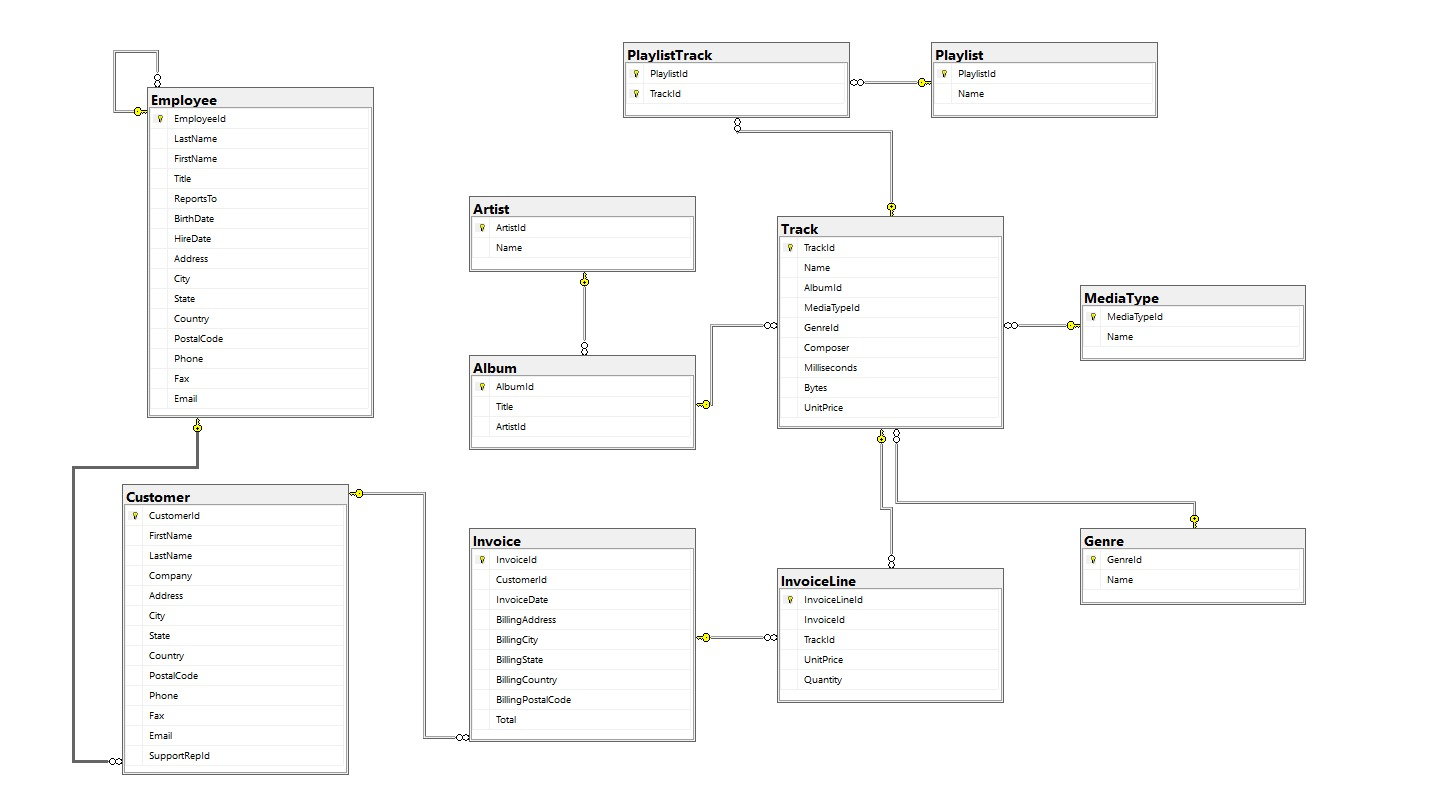

### Now lets start working with it!

### 1. Load Data

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the connection string
server = 'DESKTOP-R753PEO'
database = 'Chinook_AutoIncrement'

engine = create_engine(f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes')

In [3]:
connection = engine.connect()

In [4]:
# Loading customer, invoice, and track tables
employee_query = "SELECT * FROM Employee"
customer_query = "SELECT * FROM Customer"
invoice_query = "SELECT * FROM Invoice"
track_query = "SELECT * FROM Track"

employees = pd.read_sql(employee_query, connection)
customers = pd.read_sql(customer_query, connection)
invoices = pd.read_sql(invoice_query, connection)
tracks = pd.read_sql(track_query, connection)


### 2. EDA

In [5]:
# Review head of each table
print("\nEmployee Table Head:")
print(employees.head())

print("Customer Table Head:")
print(customers.head())



Employee Table Head:
   EmployeeId LastName FirstName                Title  ReportsTo  BirthDate  \
0           1    Adams    Andrew      General Manager        NaN 1962-02-18   
1           2  Edwards     Nancy        Sales Manager        1.0 1958-12-08   
2           3  Peacock      Jane  Sales Support Agent        2.0 1973-08-29   
3           4     Park  Margaret  Sales Support Agent        2.0 1947-09-19   
4           5  Johnson     Steve  Sales Support Agent        2.0 1965-03-03   

    HireDate              Address      City State Country PostalCode  \
0 2002-08-14  11120 Jasper Ave NW  Edmonton    AB  Canada    T5K 2N1   
1 2002-05-01         825 8 Ave SW   Calgary    AB  Canada    T2P 2T3   
2 2002-04-01        1111 6 Ave SW   Calgary    AB  Canada    T2P 5M5   
3 2003-05-03     683 10 Street SW   Calgary    AB  Canada    T2P 5G3   
4 2003-10-17         7727B 41 Ave   Calgary    AB  Canada    T3B 1Y7   

               Phone                Fax                     Email  
0 

In [6]:

print("\nInvoice Table Head:")
print(invoices.head())

print("\nTrack Table Head:")
print(tracks.head())


Invoice Table Head:
   InvoiceId  CustomerId InvoiceDate           BillingAddress BillingCity  \
0          1           2  2021-01-01  Theodor-Heuss-Straße 34   Stuttgart   
1          2           4  2021-01-02         Ullevålsveien 14        Oslo   
2          3           8  2021-01-03          Grétrystraat 63    Brussels   
3          4          14  2021-01-06           8210 111 ST NW    Edmonton   
4          5          23  2021-01-11          69 Salem Street      Boston   

  BillingState BillingCountry BillingPostalCode  Total  
0         None        Germany             70174   1.98  
1         None         Norway              0171   3.96  
2         None        Belgium              1000   5.94  
3           AB         Canada           T6G 2C7   8.91  
4           MA            USA              2113  13.86  

Track Table Head:
   TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1

In [7]:
# Display the structure of each table
print("\nEmployee Table Info:")
print(employees.info())

print("\nCustomer Table Info:")
print(customers.info())



Employee Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeId  8 non-null      int64         
 1   LastName    8 non-null      object        
 2   FirstName   8 non-null      object        
 3   Title       8 non-null      object        
 4   ReportsTo   7 non-null      float64       
 5   BirthDate   8 non-null      datetime64[ns]
 6   HireDate    8 non-null      datetime64[ns]
 7   Address     8 non-null      object        
 8   City        8 non-null      object        
 9   State       8 non-null      object        
 10  Country     8 non-null      object        
 11  PostalCode  8 non-null      object        
 12  Phone       8 non-null      object        
 13  Fax         8 non-null      object        
 14  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
m

In [8]:

print("\nInvoice Table Info:")
print(invoices.info())

print("\nTrack Table Info:")
print(tracks.info())


Invoice Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB
None

Track Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------    

In [9]:
# Summary statistics
print("\nEmployee Table Summary:")
print(employees.describe())

print("\nCustomer Table Summary:")
print(customers.describe())

print("\nInvoice Table Summary:")
print(invoices.describe())

print("\nTrack Table Summary:")
print(tracks.describe())


Employee Table Summary:
       EmployeeId  ReportsTo            BirthDate             HireDate
count     8.00000   7.000000                    8                    8
mean      4.50000   2.857143  1964-12-10 03:00:00  2003-04-15 06:00:00
min       1.00000   1.000000  1947-09-19 00:00:00  2002-04-01 00:00:00
25%       2.75000   1.500000  1961-05-02 00:00:00  2002-07-18 18:00:00
50%       4.50000   2.000000  1966-08-06 00:00:00  2003-07-25 12:00:00
75%       6.25000   4.000000  1971-03-07 06:00:00  2003-11-05 06:00:00
max       8.00000   6.000000  1973-08-29 00:00:00  2004-03-04 00:00:00
std       2.44949   2.193063                  NaN                  NaN

Customer Table Summary:
       CustomerId  SupportRepId
count   59.000000     59.000000
mean    30.000000      3.949153
std     17.175564      0.818403
min      1.000000      3.000000
25%     15.500000      3.000000
50%     30.000000      4.000000
75%     44.500000      5.000000
max     59.000000      5.000000

Invoice Table Summary:

In [10]:
# Checking customers countries
print("\n Values Count in Customer Country:")
print(customers['Country'].value_counts())


 Values Count in Customer Country:
Country
USA               13
Canada             8
France             5
Brazil             5
Germany            4
United Kingdom     3
Portugal           2
Czech Republic     2
India              2
Belgium            1
Austria            1
Norway             1
Denmark            1
Ireland            1
Hungary            1
Finland            1
Netherlands        1
Italy              1
Spain              1
Poland             1
Sweden             1
Australia          1
Argentina          1
Chile              1
Name: count, dtype: int64


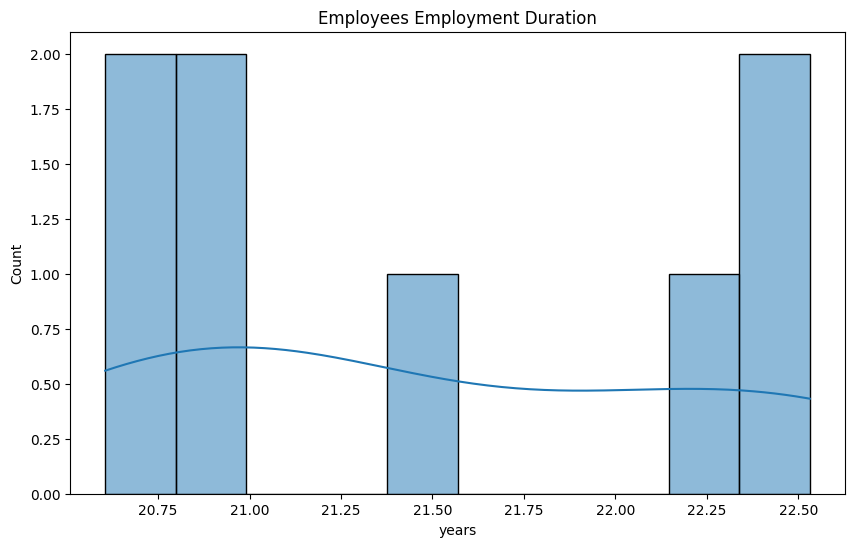

In [14]:
#Distribution of employment duration
employees['EmploymentDuration'] = (pd.to_datetime('today') - pd.to_datetime(employees['HireDate'])).dt.days / 365

plt.figure(figsize=(10, 6))
sns.histplot(employees['EmploymentDuration'], bins=10, kde=True)
plt.title('Employees Employment Duration')
plt.xlabel('years')
plt.show()

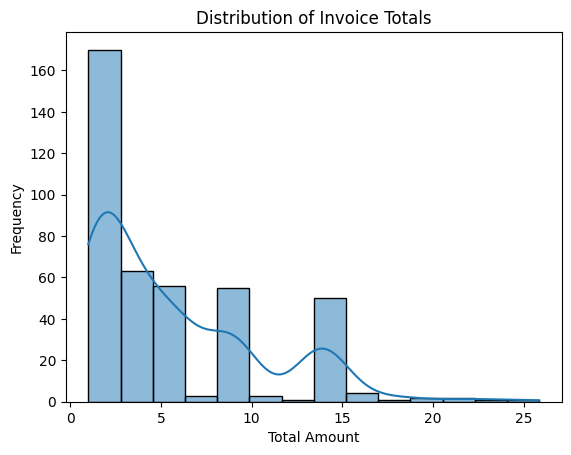

In [15]:
# Distribution of invoice totals
sns.histplot(invoices['Total'], kde=True)
plt.title('Distribution of Invoice Totals')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

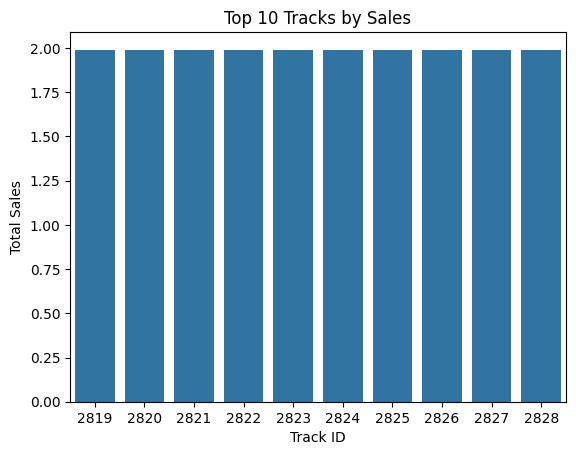

In [16]:
# Top 10 tracks by sales
track_sales = tracks.groupby('TrackId')['UnitPrice'].sum().reset_index().sort_values(by='UnitPrice', ascending=False).head(10)

sns.barplot(x='TrackId', y='UnitPrice', data=track_sales)
plt.title('Top 10 Tracks by Sales')
plt.xlabel('Track ID')
plt.ylabel('Total Sales')
plt.show()

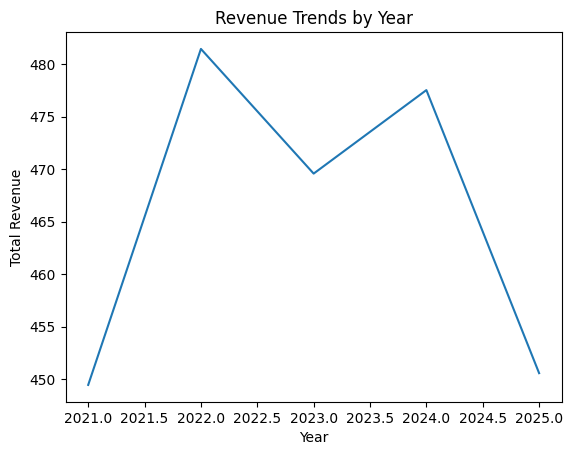

In [17]:
# Converting invoice date to datetime
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate'])
invoices['Year'] = invoices['InvoiceDate'].dt.year
invoices['Month'] = invoices['InvoiceDate'].dt.month

# Group by year for sales trends
sales_trends = invoices.groupby('Year')['Total'].sum().reset_index()

sns.lineplot(x='Year', y='Total', data=sales_trends)
plt.title('Revenue Trends by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

### 2. Checking Missing Values

In [18]:
# Checking for missing values in all tables
print("Missing Values in Employees Table:")
print(employees.isnull().sum())

print("\nMissing Values in Customers Table:")
print(customers.isnull().sum())


Missing Values in Employees Table:
EmployeeId            0
LastName              0
FirstName             0
Title                 0
ReportsTo             1
BirthDate             0
HireDate              0
Address               0
City                  0
State                 0
Country               0
PostalCode            0
Phone                 0
Fax                   0
Email                 0
EmploymentDuration    0
dtype: int64

Missing Values in Customers Table:
CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64


In [19]:

print("\nMissing Values in Invoices Table:")
print(invoices.isnull().sum())

print("\nMissing Values in Tracks Table:")
print(tracks.isnull().sum())


Missing Values in Invoices Table:
InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
BillingPostalCode     28
Total                  0
Year                   0
Month                  0
dtype: int64

Missing Values in Tracks Table:
TrackId           0
Name              0
AlbumId           0
MediaTypeId       0
GenreId           0
Composer        977
Milliseconds      0
Bytes             0
UnitPrice         0
dtype: int64


### 3. Checking Outliers

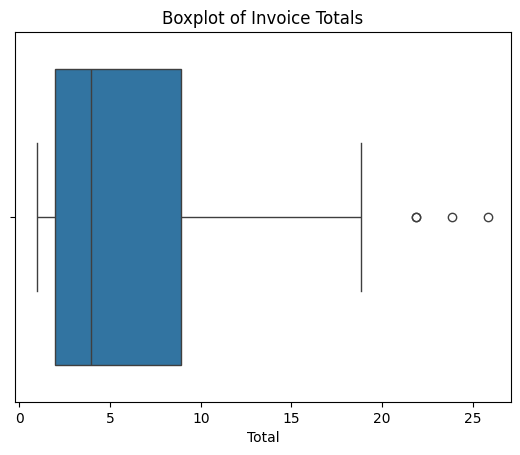

In [20]:
# Plotting boxplot for invoice totals to detect outliers
sns.boxplot(x=invoices['Total'])
plt.title('Boxplot of Invoice Totals')
plt.show()

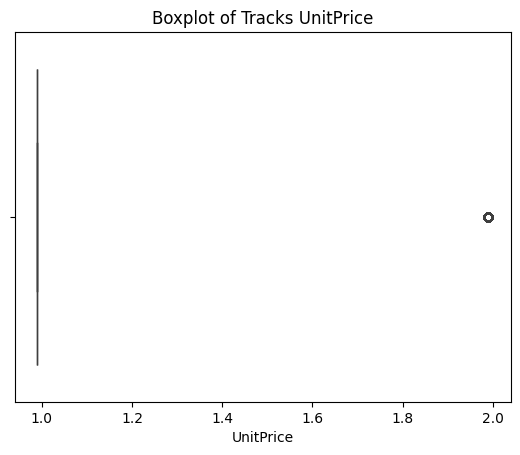

In [21]:
# Plotting boxplot for tracks unit price to detect outliers
sns.boxplot(x=tracks['UnitPrice'])
plt.title('Boxplot of Tracks UnitPrice')
plt.show()

### 4. Cleaning Data

In [22]:
# Dropping the 'BillingState' column
invoices = invoices.drop(columns='BillingState')
invoices.columns

Index(['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress',
       'BillingCity', 'BillingCountry', 'BillingPostalCode', 'Total', 'Year',
       'Month'],
      dtype='object')

In [23]:
# Convert 'BillingPostalCode' to numeric, non-convertible values will become NaN
invoices["BillingPostalCode"] = pd.to_numeric(invoices["BillingPostalCode"], errors='coerce')

# Replace NaN values in 'BillingPostalCode' with the mean of the column
invoices["BillingPostalCode"] = invoices["BillingPostalCode"].fillna(invoices["BillingPostalCode"].mean())

# Check the result
print(invoices["BillingPostalCode"].head())
invoices.isnull().sum()

0    70174.0
1      171.0
2     1000.0
3    50879.8
4     2113.0
Name: BillingPostalCode, dtype: float64


InvoiceId            0
CustomerId           0
InvoiceDate          0
BillingAddress       0
BillingCity          0
BillingCountry       0
BillingPostalCode    0
Total                0
Year                 0
Month                0
dtype: int64

In [24]:
# Replace NaN values in 'Company' with the 'No Company' of the column
customers['Company'] = customers["Company"].fillna('No company')
# Check the result
customers['Company'].head()
customers.isnull().sum()

CustomerId       0
FirstName        0
LastName         0
Company          0
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64

In [25]:
# Dropping the 'Fax', 'State' columns
customers = customers.drop(columns=['Fax', 'State'])
#check the results
customers.columns

Index(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City',
       'Country', 'PostalCode', 'Phone', 'Email', 'SupportRepId'],
      dtype='object')

In [26]:
# Replace missing values in 'Composer' column with 'Unknown'
tracks['Composer'] = tracks['Composer'].fillna('Unknown')

# Verify if all missing values are handled
tracks = tracks.isnull().sum()
print(tracks)


TrackId         0
Name            0
AlbumId         0
MediaTypeId     0
GenreId         0
Composer        0
Milliseconds    0
Bytes           0
UnitPrice       0
dtype: int64


### 5. Filtering Unnecessary Records

In [27]:
# Filtering out customers with no purchases
# calculating total revenue per customer
total_revenue_query = """
SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalRevenue
FROM Customer c
LEFT JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
"""

customer_total_revenue = pd.read_sql(total_revenue_query, connection)

active_customers = customer_total_revenue[customer_total_revenue['TotalRevenue'] > 0]
active_customers.head()

,CustomerId,FirstName,LastName,TotalRevenue
0,1,Luís,Gonçalves,39.62
1,2,Leonie,Köhler,37.62
2,3,François,Tremblay,39.62
3,4,Bjørn,Hansen,39.62
4,5,František,Wichterlová,40.62


### 6. Data Analysis

In [28]:
# Query to calculate total revenue per customer
customer_Segment_query = """
            SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalPurchases FROM Customer c
            JOIN Invoice i ON c.CustomerId = i.CustomerId
            GROUP BY c.CustomerId, c.FirstName, c.LastName;"""

customer_revenue = pd.read_sql(customer_Segment_query, connection)

customers['ValueSegment'] = pd.cut(customer_revenue['TotalPurchases'], bins=[0, 38, 40, 45, float('inf')],
                                        labels=['Low Value', 'Medium Value', 'High Value', 'VIP'])

customers['PurchaseFrequency'] = pd.cut(customer_revenue['TotalPurchases'],
                                    bins=[0, 38, 40, 45, float('inf')],
                                    labels=['Rare', 'Occasional', 'Frequent', 'Loyal'])
customers.head()

,CustomerId,FirstName,LastName,Company,Address,City,Country,PostalCode,Phone,Email,SupportRepId,ValueSegment,PurchaseFrequency
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,Brazil,12227-000,+55 (12) 3923-5555,luisg@embraer.com.br,3,Medium Value,Occasional
1,2,Leonie,Köhler,No company,Theodor-Heuss-Straße 34,Stuttgart,Germany,70174,+49 0711 2842222,leonekohler@surfeu.de,5,Low Value,Rare
2,3,François,Tremblay,No company,1498 rue Bélanger,Montréal,Canada,H2G 1A7,+1 (514) 721-4711,ftremblay@gmail.com,3,Medium Value,Occasional
3,4,Bjørn,Hansen,No company,Ullevålsveien 14,Oslo,Norway,0171,+47 22 44 22 22,bjorn.hansen@yahoo.no,4,Medium Value,Occasional
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,Czech Republic,14700,+420 2 4172 5555,frantisekw@jetbrains.com,4,High Value,Frequent


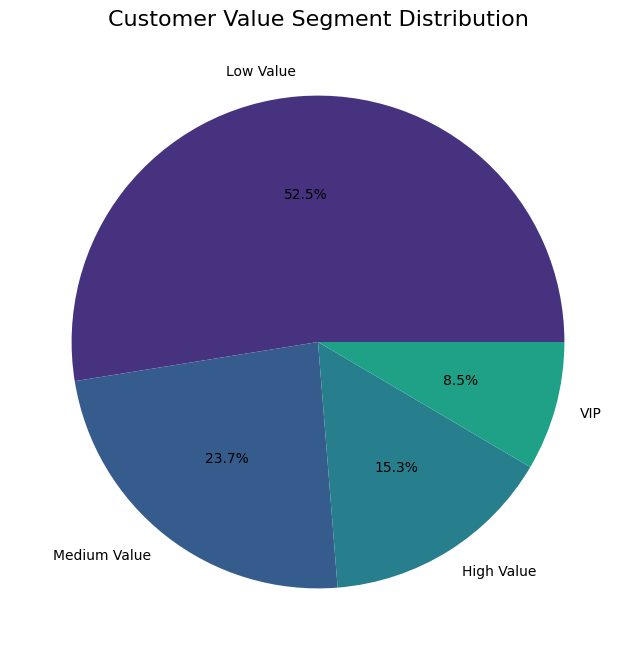

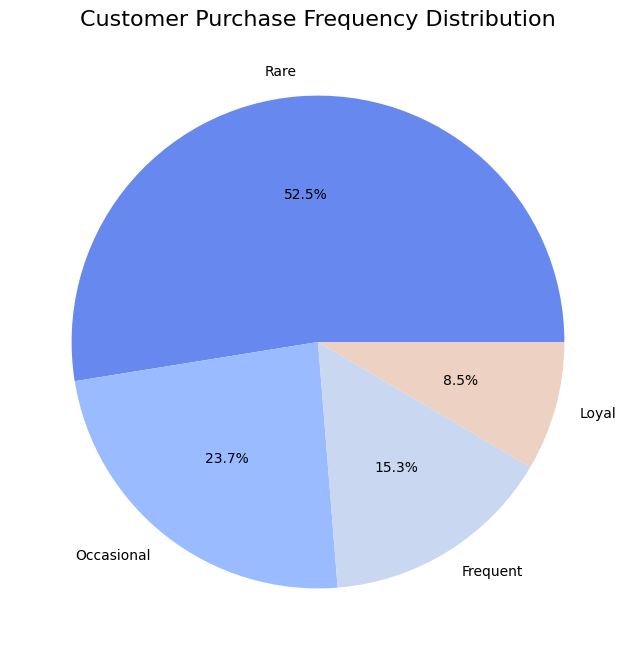

In [29]:
# Pie chart for Value Segment distribution
plt.figure(figsize=(8, 8))
customers['ValueSegment'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Customer Value Segment Distribution', fontsize=16)
plt.ylabel('')
plt.show()

# Pie chart for Purchase Frequency distribution
plt.figure(figsize=(8, 8))
customers['PurchaseFrequency'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
plt.title('Customer Purchase Frequency Distribution', fontsize=16)
plt.ylabel('')
plt.show()


In [30]:
# Query for revenue by country
country_revenue_query = """
SELECT BillingCountry, SUM(Total) AS TotalRevenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY TotalRevenue DESC
"""
country_revenue = pd.read_sql(country_revenue_query, connection)

country_revenue.head()


,BillingCountry,TotalRevenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


C:\Users\original\AppData\Local\Temp\ipykernel_1644\2401071211.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalRevenue', y='BillingCountry', data=country_revenue_sorted, palette='magma')


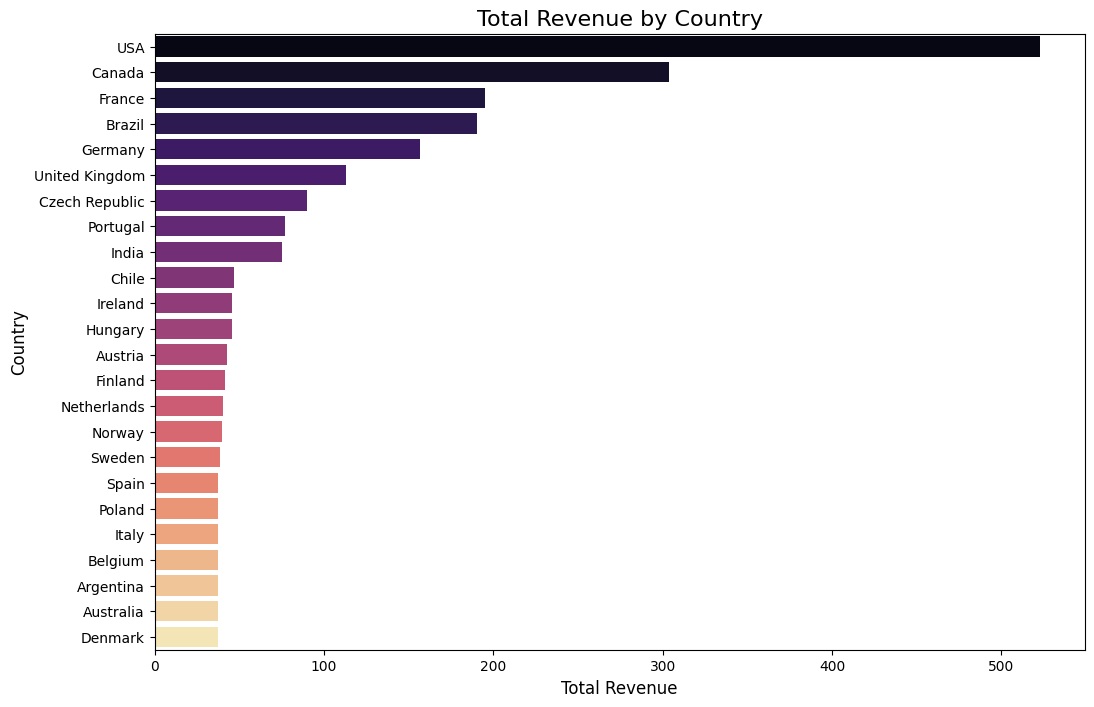

In [31]:
# Create a bar plot for revenue by country
plt.figure(figsize=(12, 8))

# Sorting countries by total revenue for better visualization
country_revenue_sorted = country_revenue.sort_values(by='TotalRevenue', ascending=False)

# Plotting the data
sns.barplot(x='TotalRevenue', y='BillingCountry', data=country_revenue_sorted, palette='magma')
plt.title('Total Revenue by Country', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

C:\Users\original\AppData\Local\Temp\ipykernel_1644\2278900222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalRevenue', y='FirstName', data=top_customers, palette='viridis')


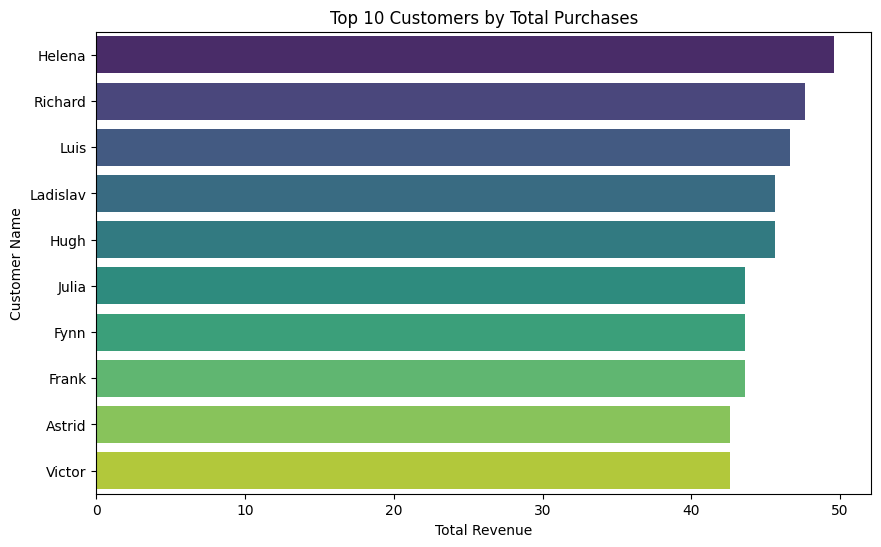

In [32]:
# Top Customers by purchase
top_customers = customer_total_revenue.sort_values(by='TotalRevenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='FirstName', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Total Purchases')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.show()

C:\Users\original\AppData\Local\Temp\ipykernel_1644\1206261236.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Genre', data=genre_sales.head(10), palette='magma')


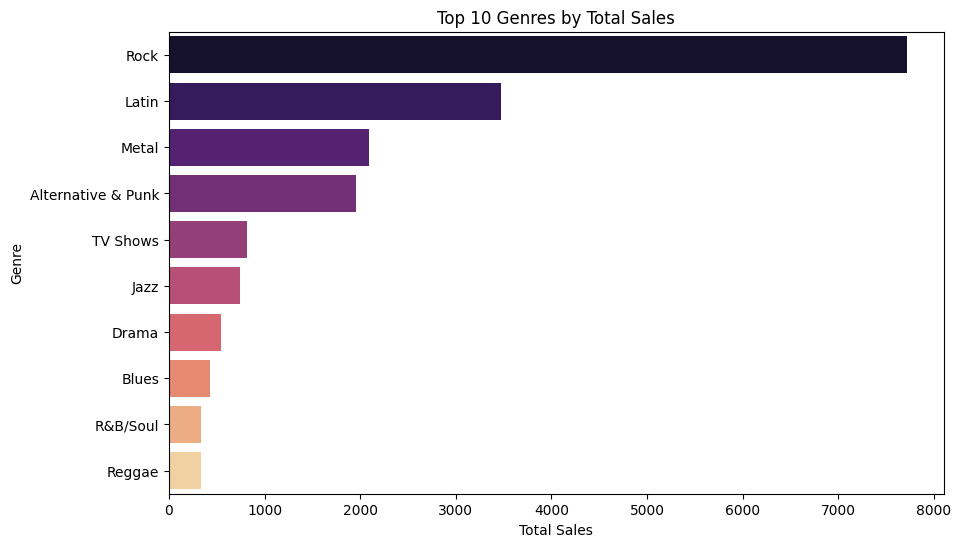

In [33]:
# Query to calculate total sales by genre
genre_sales_query = """
SELECT g.Name AS Genre, SUM(i.Total) AS TotalSales
FROM Invoice i
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY TotalSales DESC
"""
genre_sales = pd.read_sql(genre_sales_query, connection)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Genre', data=genre_sales.head(10), palette='magma')
plt.title('Top 10 Genres by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Genre')
plt.show()


C:\Users\original\AppData\Local\Temp\ipykernel_1644\742347149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSold', y='TrackName', data=top_tracks, palette='Blues_d')


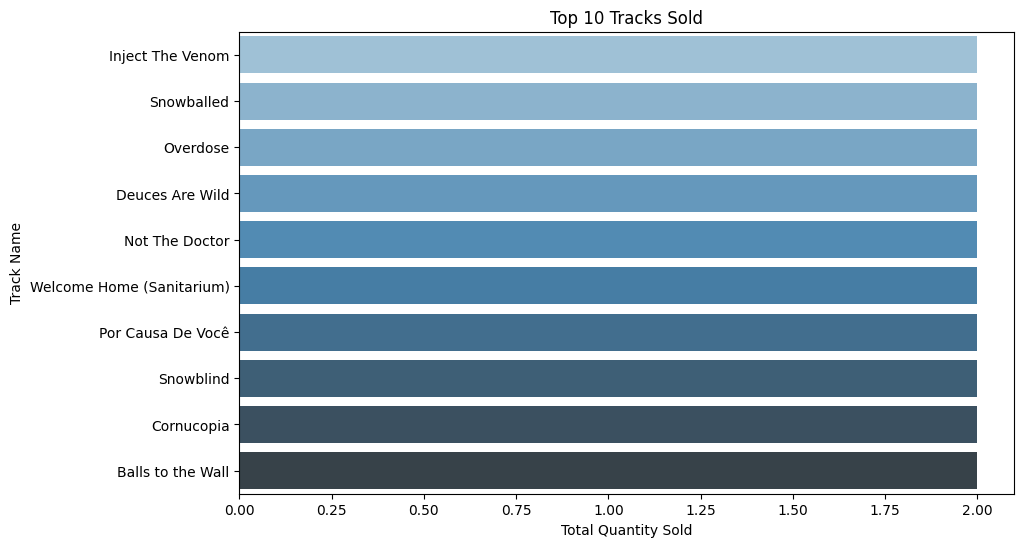

In [34]:
# Query to get top tracks sold
top_tracks_query = """
                SELECT TOP 10 t.Name AS TrackName, SUM(il.Quantity) AS TotalSold
                FROM InvoiceLine il
                JOIN Track t ON il.TrackId = t.TrackId
                GROUP BY t.TrackId, t.Name
                ORDER BY TotalSold DESC;"""
                
top_tracks = pd.read_sql(top_tracks_query, connection)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSold', y='TrackName', data=top_tracks, palette='Blues_d')
plt.title('Top 10 Tracks Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Track Name')
plt.show()


C:\Users\original\AppData\Local\Temp\ipykernel_1644\4261661071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Artist', data=top_artists, palette='Oranges_d')


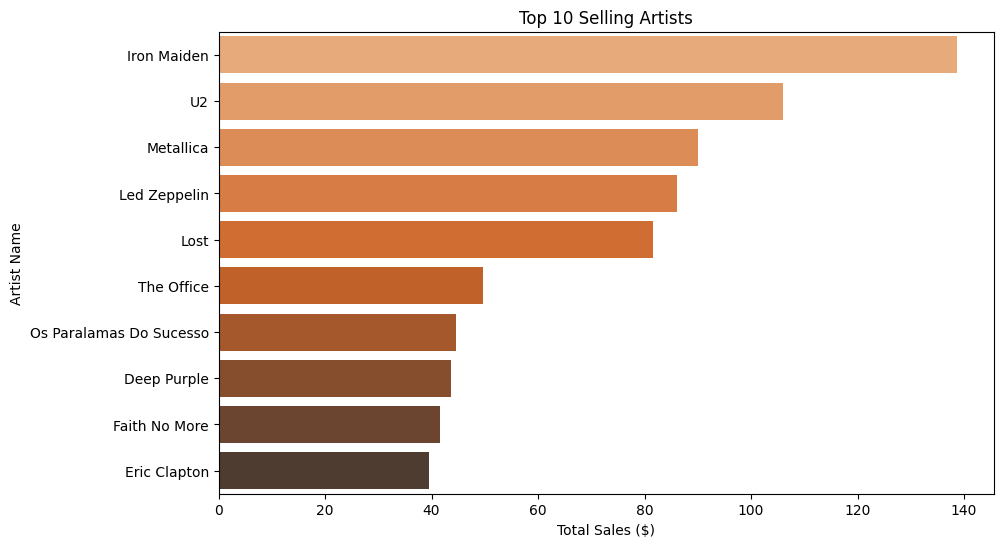

In [35]:
# Query to get top selling artists
top_artists_query = """
SELECT top 10 ar.Name AS Artist, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY TotalSales DESC;
"""
top_artists = pd.read_sql(top_artists_query, connection)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Artist', data=top_artists, palette='Oranges_d')
plt.title('Top 10 Selling Artists')
plt.xlabel('Total Sales ($)')
plt.ylabel('Artist Name')
plt.show()



### 7. Saving data into CSV

In [36]:
customer_total_revenue.to_csv('customer_total_revenue.csv', index=False)
customer_revenue.to_csv('customer_revenue.csv', index=False)
country_revenue.to_csv('country_revenue.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)
genre_sales.to_csv('genre_sales.csv', index=False)
top_tracks.to_csv('top_tracks.csv', index=False)
top_artists.to_csv('top_artists.csv', index=False)

In [37]:
import os
print(os.getcwd())  # This prints pwd


c:\Users\original\Downloads
